Text(0.5, 1.0, 'Кількість програмістів')

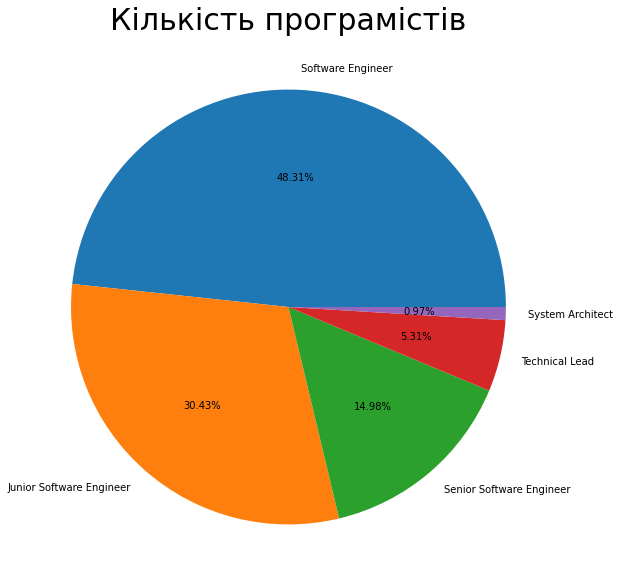

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#Прочитайте файл 2017_jun_final.csv с помощью метода read_csv
df = pd.read_csv('2017_jun_final.csv')

#Прочитайте полученную таблицу используя метод head
#print(df.head())

#Определите размер таблицы с помощью метода shape
#print(df.shape)

#Определите типы всех столбцов с помощью dataframe.dtypes
#print(df.dtypes)

#Посчитайте, какая доля пропусков содержится в каждой колонке (используйте методы isnull и sum)
columns = list(df.columns)
for col in columns:
    sum_nan = 0
    for i in df[col].isnull():
        if i:
            sum_nan += 1
    #print(f'{col} NaN percentage: {sum_nan*100/df[col].shape[0]}')
    
#Удалите все столбцы с пропусками, кроме столбца "Язык.программирования"
for col in columns:
    sum_nan = 0
    for i in df[col].isnull():
        if i:
            sum_nan += 1
    if col != 'Язык.программирования' and sum_nan:
        df.drop([col], axis = 1, inplace = True)
        
#Опять посчитайте, какая доля пропусков содержится в каждой колонке и убедитесь, что остался только столбец "Язык.программирования"
columns = list(df.columns)
for col in columns:
    sum_nan = 0
    for i in df[col].isnull():
        if i:
            sum_nan += 1
    #print(f'{col} NaN percentage: {sum_nan*100/df[col].shape[0]}')
    
#Удалите все строки в исходной таблице с помощью метода dropna
df = df.dropna()

#Определите новый размер таблицы с помощью метода shape
#print(df.shape)

#Создайте новую таблицу python_data в которой будут только строки со специалистами указавшими язык программирования Python
python_data = pd.read_csv('2017_jun_final.csv')
python_data = python_data[python_data['Язык.программирования'] == 'Python']

#Определите размер таблицы python_data с помощью метода shape
#print(python_data.shape)

#Используя метод groupby выполните группировку по столбцу "Должность"
python_data.groupby('Должность')

#Создайте новый DataFrame, где для сгруппированных данных по столбцу "Должность", выполните агрегацию данных с помощью метода agg и найдите минимальное и максимальное значение в столбце "Зарплата.в.месяц"
zp_data = python_data.groupby('Должность')['Зарплата.в.месяц'].agg(['min', 'max'])

#Создайте функцию fill_avg_salary которая будет возвращать среднее значение заработной платы в месяц. Используйте ее для метода apply и создайте новый столбик "avg"
def fill_avg_salary(df):
    return (df['min'] + df['max'])/2

avg = zp_data.apply(fill_avg_salary, axis = 1)
zp_data['avg'] = avg

#Создайте описательную статистику с помощью метода describe для нового столбца.
zp_data['avg'].describe()

#Сохраните полученную таблицу в CSV файл
zp_data.to_csv('hw2.csv')

'''
plt.figure(figsize = (12, 5))
plt.plot(zp_data.index, zp_data['min'], color = 'r', label = 'min')
plt.plot(zp_data.index, zp_data['avg'], color = 'b', label = 'average')
plt.plot(zp_data.index, zp_data['max'], color = 'g', label = 'max')
plt.title('Сравнение зарплат в Data Science', fontstyle = 'oblique', fontweight = 'bold', fontsize = '20')
plt.xlabel('Proffession', fontsize = 25)
plt.ylabel('Salary', fontsize = 25)
plt.legend()
'''
'''
sub = python_data['Должность'].value_counts()
plt.figure(figsize = (12, 5))
plt.bar(sub.index, sub.values , align = 'center', width = 0.3, color = ['b','g','y','r'])
'''
'''
sub = python_data['Должность'].value_counts()
plt.figure(figsize = (10, 10))
plt.pie(sub, labels = sub.index, autopct = '%.2f%%')
plt.title('Співвідношення програмістів', fontsize = 30)
'''
